In [1]:
%%capture
!pip install pydna
!pip install teemi
!pip install matplotlib

In [2]:
from pydna.dseqrecord import Dseqrecord
from Bio.Restriction import AsiSI
from pydna.amplify import pcr
from pydna.gel import gel
from pydna.ladders import *

# 03_1_BUILD_USER_gRNA_plasmid

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/teemi/blob/main/colab_notebooks/03_1_BUILD_USER_gRNA_plasmid.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

We can clone the teemi Repo to this notebook - 
benefitting from all the cool features of teemi. 


In [3]:
!git clone https://github.com/hiyama341/G8H_CPR_library.git

fatal: destination path 'G8H_CPR_library' already exists and is not an empty directory.


## Intro - Making a USER plasmid 


In this notebook, we aim to construct a CRISPR plasmid utilizing USER cloning technology. This plasmid will be used to generate a background strain that can be used for downstream experimentation and validation. USER cloning is a powerful technique that allows for the efficient and precise insertion of DNA fragments into a plasmid vector. This method utilizes a unique restriction enzyme, Uracil-Specific Excision Reagent (USER) that cleaves the plasmid at a specific site and allows for the easy insertion of the desired DNA fragment. By using USER cloning, we will be able to construct a CRISPR plasmid with high precision and accuracy, minimizing the potential for errors and off-target effects.

Once the CRISPR plasmid is constructed, it will be used to generate a background strain that can be used for downstream experimentation. This background strain will serve as a control for subsequent studies, allowing us to evaluate the effects of the different gene combinations on the phenotype of the organism. Additionally, by generating a background strain with a well-defined genetic makeup, we will be able to conduct more controlled and accurate experiments, providing valuable insights into the underlying mechanisms of the gene combinations.

## Project overview


**Hypothesis**
1. Specific combinations of CPR / G8H homologs and corresponding expression levels can remove the G8H bottleneck in the Strictosidine pathway

Aim: To test the hypothesis

Tasks
1. **dgRNA**
    - to knockout G8H and CPR in MIA-CM-3
2. Base strain
3. Library
4. Phenotyping
5. Data analysis


The workflow: 

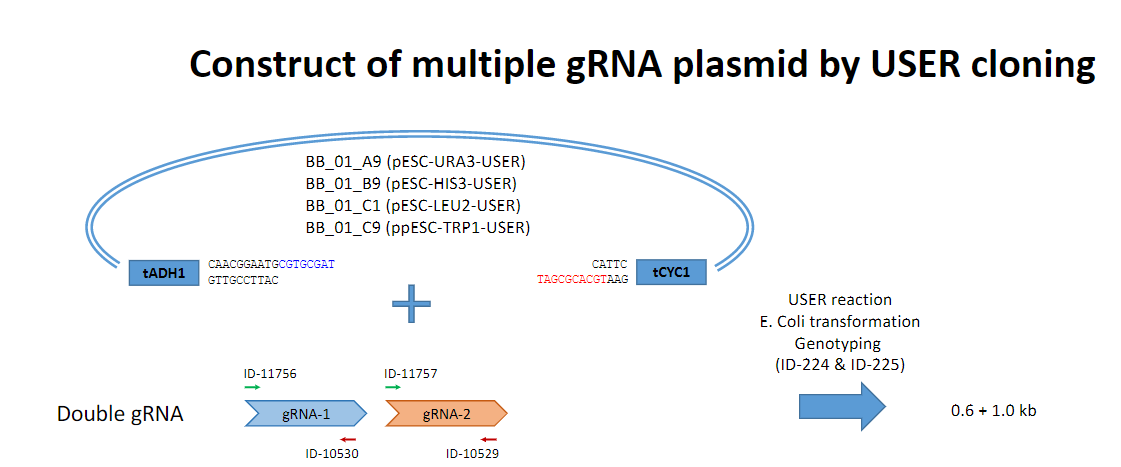

In [4]:
from IPython.display import Image
Image("G8H_CPR_library/pictures/Construct_multiple_gRNA.png", width=1000, height=400)

# 1. Plasmid construction

We can import Fasta files with biopython. Alternatively this could be done directly from a database such as benchling or teselagen or teemis CSV_database

In [5]:
from teemi.lims.csv_database import get_database, get_dna_from_plate_name, get_dna_from_box_name

So the following code shows the plasmids we have stored in boxes and contains information about location, when it was added and so on. We can add concentration and more if we want. 

In [6]:
plasmid_plates = get_database('plasmid_plates', path= 'G8H_CPR_library/data/06-lims/csv_database/')
plasmid_plates.head(10)

,ID,name,date,plate,row,col,size,seq,concentration,volume,features,location,reference,comments,description
0,10000.0,Backbone_template - p0056_(pESC-LEU-ccdB-USER)...,08-15-2022,0,A,1,8798.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,107.0,139.0,[],plasmid_plates,NaN,NaN,seq_xRUzXWHM <unknown description>
1,10001.0,gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta,08-15-2022,0,A,2,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,93.0,118.0,[],plasmid_plates,NaN,NaN,seq_Qy1hV9Gf <unknown description>
2,10002.0,LEU_plasmid.fasta,08-15-2022,0,A,3,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,78.0,86.0,[],plasmid_plates,NaN,NaN,seq_Qy1hV9Gf <unknown description>
3,10003.0,PL_02_E2(pRS413U-P2_PGK1-mKate2.fasta,08-15-2022,0,A,4,6982.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,100.0,144.0,[],plasmid_plates,NaN,NaN,seq_stP1p5JB <unknown description>
4,10004.0,pCfB-56(pESC-LEU-gRNA_ATF1-CroCPR).fasta,08-15-2022,0,A,5,7797.0,TGGCGGGTGTCGGGGCTGGCTTAACTATGCGGCATCAGAGCAGATT...,103.0,134.0,[],plasmid_plates,NaN,NaN,seq_AA4vOQs1 <unknown description>
5,10005.0,gRNA1_template (1).fasta,08-15-2022,0,A,6,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,129.0,101.0,[],plasmid_plates,NaN,NaN,seq_Qy1hV9Gf <unknown description>
6,10006.0,pl_12_i6_pesc-ura-grna_xi2-2.gb,08-15-2022,0,A,7,5734.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,77.0,125.0,[SeqFeature(FeatureLocation(ExactPosition(416)...,plasmid_plates,NaN,NaN,NaN
7,10007.0,TRP_POS_CONTROL_test.gb,08-15-2022,0,A,8,8798.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,118.0,122.0,[SeqFeature(FeatureLocation(ExactPosition(662)...,plasmid_plates,NaN,NaN,NaN
8,10008.0,pRS416.gb,08-15-2022,0,A,9,4898.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,85.0,90.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",plasmid_plates,NaN,NaN,pRS416
9,10009.0,pRS414.gb,08-15-2022,0,A,10,4788.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,123.0,118.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",plasmid_plates,NaN,NaN,pRS414


### 1.1 Import plasmids and primers

In [7]:
# Now we can get the plasmids we are interested in using for this workflow by simply calling the following: 
backbone = [get_dna_from_plate_name('Backbone_template - p0056_(pESC-LEU-ccdB-USER) (1).fasta', 'plasmid_plates', database_path="G8H_CPR_library/data/06-lims/csv_database/")]
gRNA1_template = [get_dna_from_plate_name('gRNA1_template (1).fasta', 'plasmid_plates', database_path="G8H_CPR_library/data/06-lims/csv_database/")]
gRNA2_template = [get_dna_from_plate_name('gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta', 'plasmid_plates', database_path="G8H_CPR_library/data/06-lims/csv_database/")]

In [8]:
# The imported fasta files are made into biopython objects as seen below: 
gRNA2_template

[SeqRecord(seq=Seq('TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCTCCCGGAGA...GTC'), id='10001.0', name='gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta', description='seq_Qy1hV9Gf <unknown description>', dbxrefs=[])]

In [9]:
# we can make the vector circular
vector = Dseqrecord(backbone[0], circular = True)
vector.annotations

{'plate': 0,
 'row': 'A',
 'col': 1,
 'batches': [{'location': 'plasmid_plates_0_A1',
   'volume': 139.0,
   'concentration': 107.0}],
 'molecule_type': 'DNA'}

In [10]:
from teemi.lims.csv_database import get_dna_from_box_name

Now we can import some pre-made USER primers

In [11]:
U_pSNR52_Fw_1 = get_dna_from_box_name('U_pSNR52_Fw_1', 'primer_box', database_path="G8H_CPR_library/data/06-lims/csv_database/")
TJOS_66_P2R = get_dna_from_box_name('TJOS_66_P2R', 'primer_box', database_path="G8H_CPR_library/data/06-lims/csv_database/")
U_pSNR52_Fw_2 = get_dna_from_box_name('U_pSNR52_Fw_2', 'primer_box', database_path="G8H_CPR_library/data/06-lims/csv_database/")
TJOS_65_P1R = get_dna_from_box_name('TJOS_65_P1R', 'primer_box', database_path="G8H_CPR_library/data/06-lims/csv_database/")

### 1.2 Simulate PCRs

We can perform a PCR with the templates and the USER primers

In [12]:
from pydna.amplify import pcr
gRNA1_pcr_prod = pcr(U_pSNR52_Fw_1,TJOS_66_P2R, gRNA1_template)
gRNA2_pcr_prod = pcr(U_pSNR52_Fw_2,TJOS_65_P1R, gRNA2_template)

We can check the lenght and sequence of the predicted PCR

In [13]:
gRNA1_pcr_prod.seq

Dseq(-425)
CGTG..AGGT
GCAC..TCCA

In [14]:
gRNA2_pcr_prod.seq

Dseq(-425)
AGTG..CGTG
TCAC..GCAC

### 1.3 Simulate USER reaction

In [15]:
from teemi.design.cloning import USER_enzyme

With the USER_enzyme function we can generate USER tails from the PCR reaction

In [16]:
gRNA1_pcr_USER = USER_enzyme(gRNA1_pcr_prod)
gRNA2_pcr_USER = USER_enzyme(gRNA2_pcr_prod)

In [17]:
gRNA1_pcr_USER.seq

Dseq(-425)
        TCTT..GTTAAGTGCAGGT
GCACGCTAAGAA..CAAT         

In [18]:
gRNA2_pcr_USER.seq

Dseq(-425)
         TCTT..GTTAATCGCGTG
TCACGTCCAAGAA..CAAT        

Now we need to open the vector with (1) restriction enzyme and (2)a nicking enzyme

In [19]:
# AsiSI cuts two places and will generate 2 fragments
vector.cut(AsiSI)

(Dseqrecord(-6972), Dseqrecord(-1830))

In [20]:
# we need the longer fragment and therfore save it as a variable vector_asiSI
vector_asiSI, cCCDB  = vector.cut(AsiSI)

print(len(vector_asiSI.seq.watson))
vector_asiSI.seq

6970


Dseq(-6972)
  CGCG..TGCGAT
TAGCGC..ACGC  

In [21]:
from teemi.design.cloning import nicking_enzyme

Now we can nick the plasmid in the following way

In [22]:
vector_asiSI_nick = nicking_enzyme(vector_asiSI)

vector_asiSI_nick = Dseqrecord(vector_asiSI_nick)
print(len(vector_asiSI_nick.seq.watson))
vector_asiSI_nick.seq


6964


Dseq(-6972)
        CATT..AATGCGTGCGAT
TAGCGCACGTAA..TTAC        

Now we can assemble the vector and the two pcr products that have been treated with USER enzyme. If the sticky ends are not compatible the program will produce a warning 

Now we can simulate a cloning step the the gRNAs and the vector together

In [23]:
rec_vec =  (vector_asiSI_nick + gRNA1_pcr_USER + gRNA2_pcr_USER).looped()
rec_vec.seq

Dseq(o7797)
CATT..CGTG
GTAA..GCAC

### 1.4 Physically making PCRs

Next step would include actually making the PCRs to assemble the plasmid and we start by annotating our PCR products with locations

In [24]:
gRNA1_pcr_prod.name = "ATF1"
gRNA1_pcr_prod.annotations['batches'] = [{'location':'l4_I07'}]
gRNA1_pcr_prod.annotations['template_location'] = "PL_05_D9"

gRNA2_pcr_prod.name = "CroCPR"
gRNA2_pcr_prod.annotations['batches'] = [{'location':'l4_I08'}]
gRNA2_pcr_prod.annotations['template_location'] = "p1_F04"

In [25]:
from teemi.build.PCR import pcr_locations

# It looks like such when we try to find the locations of the PCR products
pcr_locations([gRNA1_pcr_prod, gRNA2_pcr_prod])

,location,name,template,fw,rv
0,plasmid_plates_0_A6,ATF1,plasmid_plates_0_A6,primer_box_rack_2_B7,primer_box_rack_2_B8
1,plasmid_plates_0_A2,CroCPR,plasmid_plates_0_A2,primer_box_rack_2_B9,primer_box_rack_2_C1


Next step is to make a calculation of of the different reaction volumes that are needed for the PCRs. We can do that with the function calculate_volumes in the following way:

In [26]:
from teemi.build.PCR import calculate_volumes, Q5_NEB_PCR_program, calculate_processing_speed

calculate_volumes(vol_p_reac = 20, 
        no_of_reactions = 3,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Pol"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

,vol_p_reac,vol_p_3_reac
Template,0.4,1.2
Primer 1,1.0,3.0
Primer 2,1.0,3.0
H20,7.6,22.8
Pol,10.0,30.0
Total,20.0,60.0


In [27]:
# making the program 
gRNA1_pcr_prod.annotations['polymerase'] = 'Q5 Hot Start'
gRNA2_pcr_prod.annotations['polymerase'] = 'Q5 Hot Start'

calculate_processing_speed(gRNA1_pcr_prod)
calculate_processing_speed(gRNA2_pcr_prod)

Amplicon(425)

In [28]:
Q5_NEB_PCR_program(gRNA1_pcr_prod)

|98°C|98°C               |    |tmf:65.0
|____|_____          72°C|72°C|tmr:67.0
|30 s|10s  \ 66.0°C _____|____|30s/kb
|    |      \______/ 0:13|2min|GC 38.8%
|    |       20s         |    |425bp


In [29]:
Q5_NEB_PCR_program(gRNA2_pcr_prod)

|98°C|98°C               |    |tmf:66.0
|____|_____          72°C|72°C|tmr:66.0
|30 s|10s  \ 67.0°C _____|____|30s/kb
|    |      \______/ 0:13|2min|GC 38.8%
|    |       20s         |    |425bp


Since the primers used have excactly the same annealing sequence they get similar programs

We can simmulate what a gel would look when the PCR products and the digested plasmid are run in the following way: 

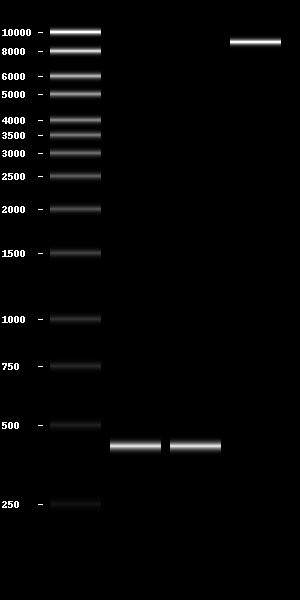

In [30]:
gel([GeneRuler_1kb,[Dseqrecord("A"*425)],[Dseqrecord("A"*425)], [vector]])

It is beneficial to keep track of volumes of each PCR and concentration and for that we can update the annotation as such: 



In [31]:
from teemi.lims.csv_database import add_annotations, get_unique_id, add_sequences_to_dataframe

In [32]:

# Adding annotations
gRNA1_pcr_prod = add_annotations([gRNA1_pcr_prod], volume = 50, concentration = 57,  location = 'l4_I07',  comments = 'gRNA with ATF1 site to KO G8H')
gRNA2_pcr_prod = add_annotations([gRNA2_pcr_prod], volume = 50, concentration = 63, location = 'l4_I08'  , comments ='gRNA with croCPR site to KO G8H')

# unnest the list
gRNA1_pcr_prod = gRNA1_pcr_prod[0]
gRNA2_pcr_prod = gRNA2_pcr_prod[0]


# getting a unique id from the databse
gRNA1_pcr_prod.id =  get_unique_id(path='G8H_CPR_library/data/06-lims/csv_database/' )
gRNA2_pcr_prod.id = get_unique_id(path='G8H_CPR_library/data/06-lims/csv_database/' )+1

# add the PCR_to the pcr_box
PCR_box = get_database('box_MASTER', path="G8H_CPR_library/data/06-lims/csv_database/")
add_sequences_to_dataframe([gRNA1_pcr_prod,gRNA2_pcr_prod ], PCR_box)


### already updated the database
#update_database(PCR_box, 'PCR_box', path ="/content/G8H_CPR_library/Data/csv_database/" )
PCR_box

,ID,name,date,box,row,col,size,seq,concentration,volume,features,location,reference,comments,description
0,10282.0,ATF1,02-06-2023,0,A,1,425.0,CGTGCGATTCTTTGAAAAGATAATGTATGATTATGCTTTCACTCAT...,57.0,50.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",l4_I07,,gRNA with ATF1 site to KO G8H,pcr_product_Stock of primers for G8H-CPR libra...
1,10283.0,CroCPR,02-06-2023,0,A,2,425.0,AGTGCAGGTTCTTTGAAAAGATAATGTATGATTATGCTTTCACTCA...,63.0,50.0,"[SeqFeature(FeatureLocation(ExactPosition(8), ...",l4_I08,,gRNA with croCPR site to KO G8H,pcr_product_Stock of primers for G8H-CPR libra...
2,NaN,NaN,NaN,0,A,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0,A,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0,A,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,NaN,NaN,NaN,9,I,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,NaN,NaN,NaN,9,I,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,NaN,NaN,NaN,9,I,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,NaN,NaN,NaN,9,I,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.5 Transformation of e.coli with the USER plasmid

The previously used plasmid we can use as a positive control and call it LEU_plasmid

In [33]:
LEU_plasmid = vector  
LEU_plasmid.name = "LEU_plasmid"

In [34]:
# We can use the nicked plasmid we simulated above
vector_asiSI_nick.name = 'pESC-LEU-gRNA_ATF1-CroCPR'
vector_asiSI_nick.annotations['batches'] = [{'location':'temp_fridge_bocx', 'concentration':vector.annotations['batches'][0]['concentration'], 'volume':10}]



Next, we want to perform a transformation reaction to assemble our plasmid and for that we need to make controls as shown below


In [35]:
reaction_names = ["pESC-LEU-gRNA_ATF1-CroCPR", "n.ctr", "n.ctr", "n.ctr", "p. ctr"]

In [36]:
reaction_participants = [[vector_asiSI_nick, gRNA1_pcr_prod,gRNA2_pcr_prod],
                         [vector_asiSI_nick],
                         [gRNA1_pcr_prod],
                         [gRNA2_pcr_prod], 
                         [LEU_plasmid]]

In [37]:
from teemi.build.transformation import ng_to_nmol, transformation_mix

In [38]:
reaction_participants

[[Dseqrecord(-6972), Amplicon(425), Amplicon(425)],
 [Dseqrecord(-6972)],
 [Amplicon(425)],
 [Amplicon(425)],
 [Dseqrecord(o8798)]]

To get a succesfull transformation we need the right molar ratios and that can be calculated with the ng_to_mol function

In [39]:
nmol_vector = ng_to_nmol(ng = 15, bp = len(vector_asiSI_nick))
nmol_gRNA = ng_to_nmol(ng = 30, bp = len(gRNA1_pcr_prod))
nmol_pctr = ng_to_nmol(ng = 10, bp = len(LEU_plasmid))

In [40]:
# in nmol
wanted_concentrations = {'pESC-LEU-gRNA_ATF1-CroCPR' : nmol_vector,
                         'ATF1'                        : nmol_gRNA,
                         'CroCPR'                      : nmol_gRNA,
                         'LEU_plasmid'                 : nmol_pctr}

In [41]:
media = ['LB_AMP'] * 5

In [42]:
reaction_participants

[[Dseqrecord(-6972), Amplicon(425), Amplicon(425)],
 [Dseqrecord(-6972)],
 [Amplicon(425)],
 [Amplicon(425)],
 [Dseqrecord(o8798)]]

Finally, we can make a transformation mix with the different parts (in the right ratios) and plate them on the designated plates as shown below

In [43]:
transformation_mix(reaction_names, 
                  reaction_participants, 
                  wanted_amounts = wanted_concentrations,
                  water_dna_p_reac = 10,
                  media = media)

,name,pESC-LEU-gRNA_ATF1-CroCPR,ATF1,CroCPR,LEU_plasmid,water,plate on
0,pESC-LEU-gRNA_ATF1-CroCPR,0.1,0.5,0.5,NaN,8.9,LB_AMP
1,n.ctr,0.1,NaN,NaN,NaN,9.9,LB_AMP
2,n.ctr,NaN,0.5,NaN,NaN,9.5,LB_AMP
3,n.ctr,NaN,NaN,0.5,NaN,9.5,LB_AMP
4,p. ctr,NaN,NaN,NaN,0.1,9.9,LB_AMP


We need to make the USER reaction mix

In [44]:
calculate_volumes(vol_p_reac = 10, 
        no_of_reactions = 6,
        standard_reagents = ["DNA","Buffer, Cutsmart","H20","Enz, USER"],
        standard_volumes = [1,1,7,1])

,vol_p_reac,vol_p_6_reac
DNA,1.0,6.0
"Buffer, Cutsmart",1.0,6.0
H20,7.0,42.0
"Enz, USER",1.0,6.0
Total,10.0,60.0



|  | °C | min | 
| --- | --- | --- |
| Incubate | 37 | 25 | 
|  | 25 | 15 | 
|  | 0 | ... | 





Transformation:

Add 90 µl DH5a cells to 10 µl USER reaction & incubate


|  | °C | min | 
| --- | --- | --- |
| Incubate | 0 | 30 | 
|  | 42 | 1.5 (90s) | 
|  | 0 | 5 | 

### 1.6 Plate on lb amp and insert picture of the transformation below: 


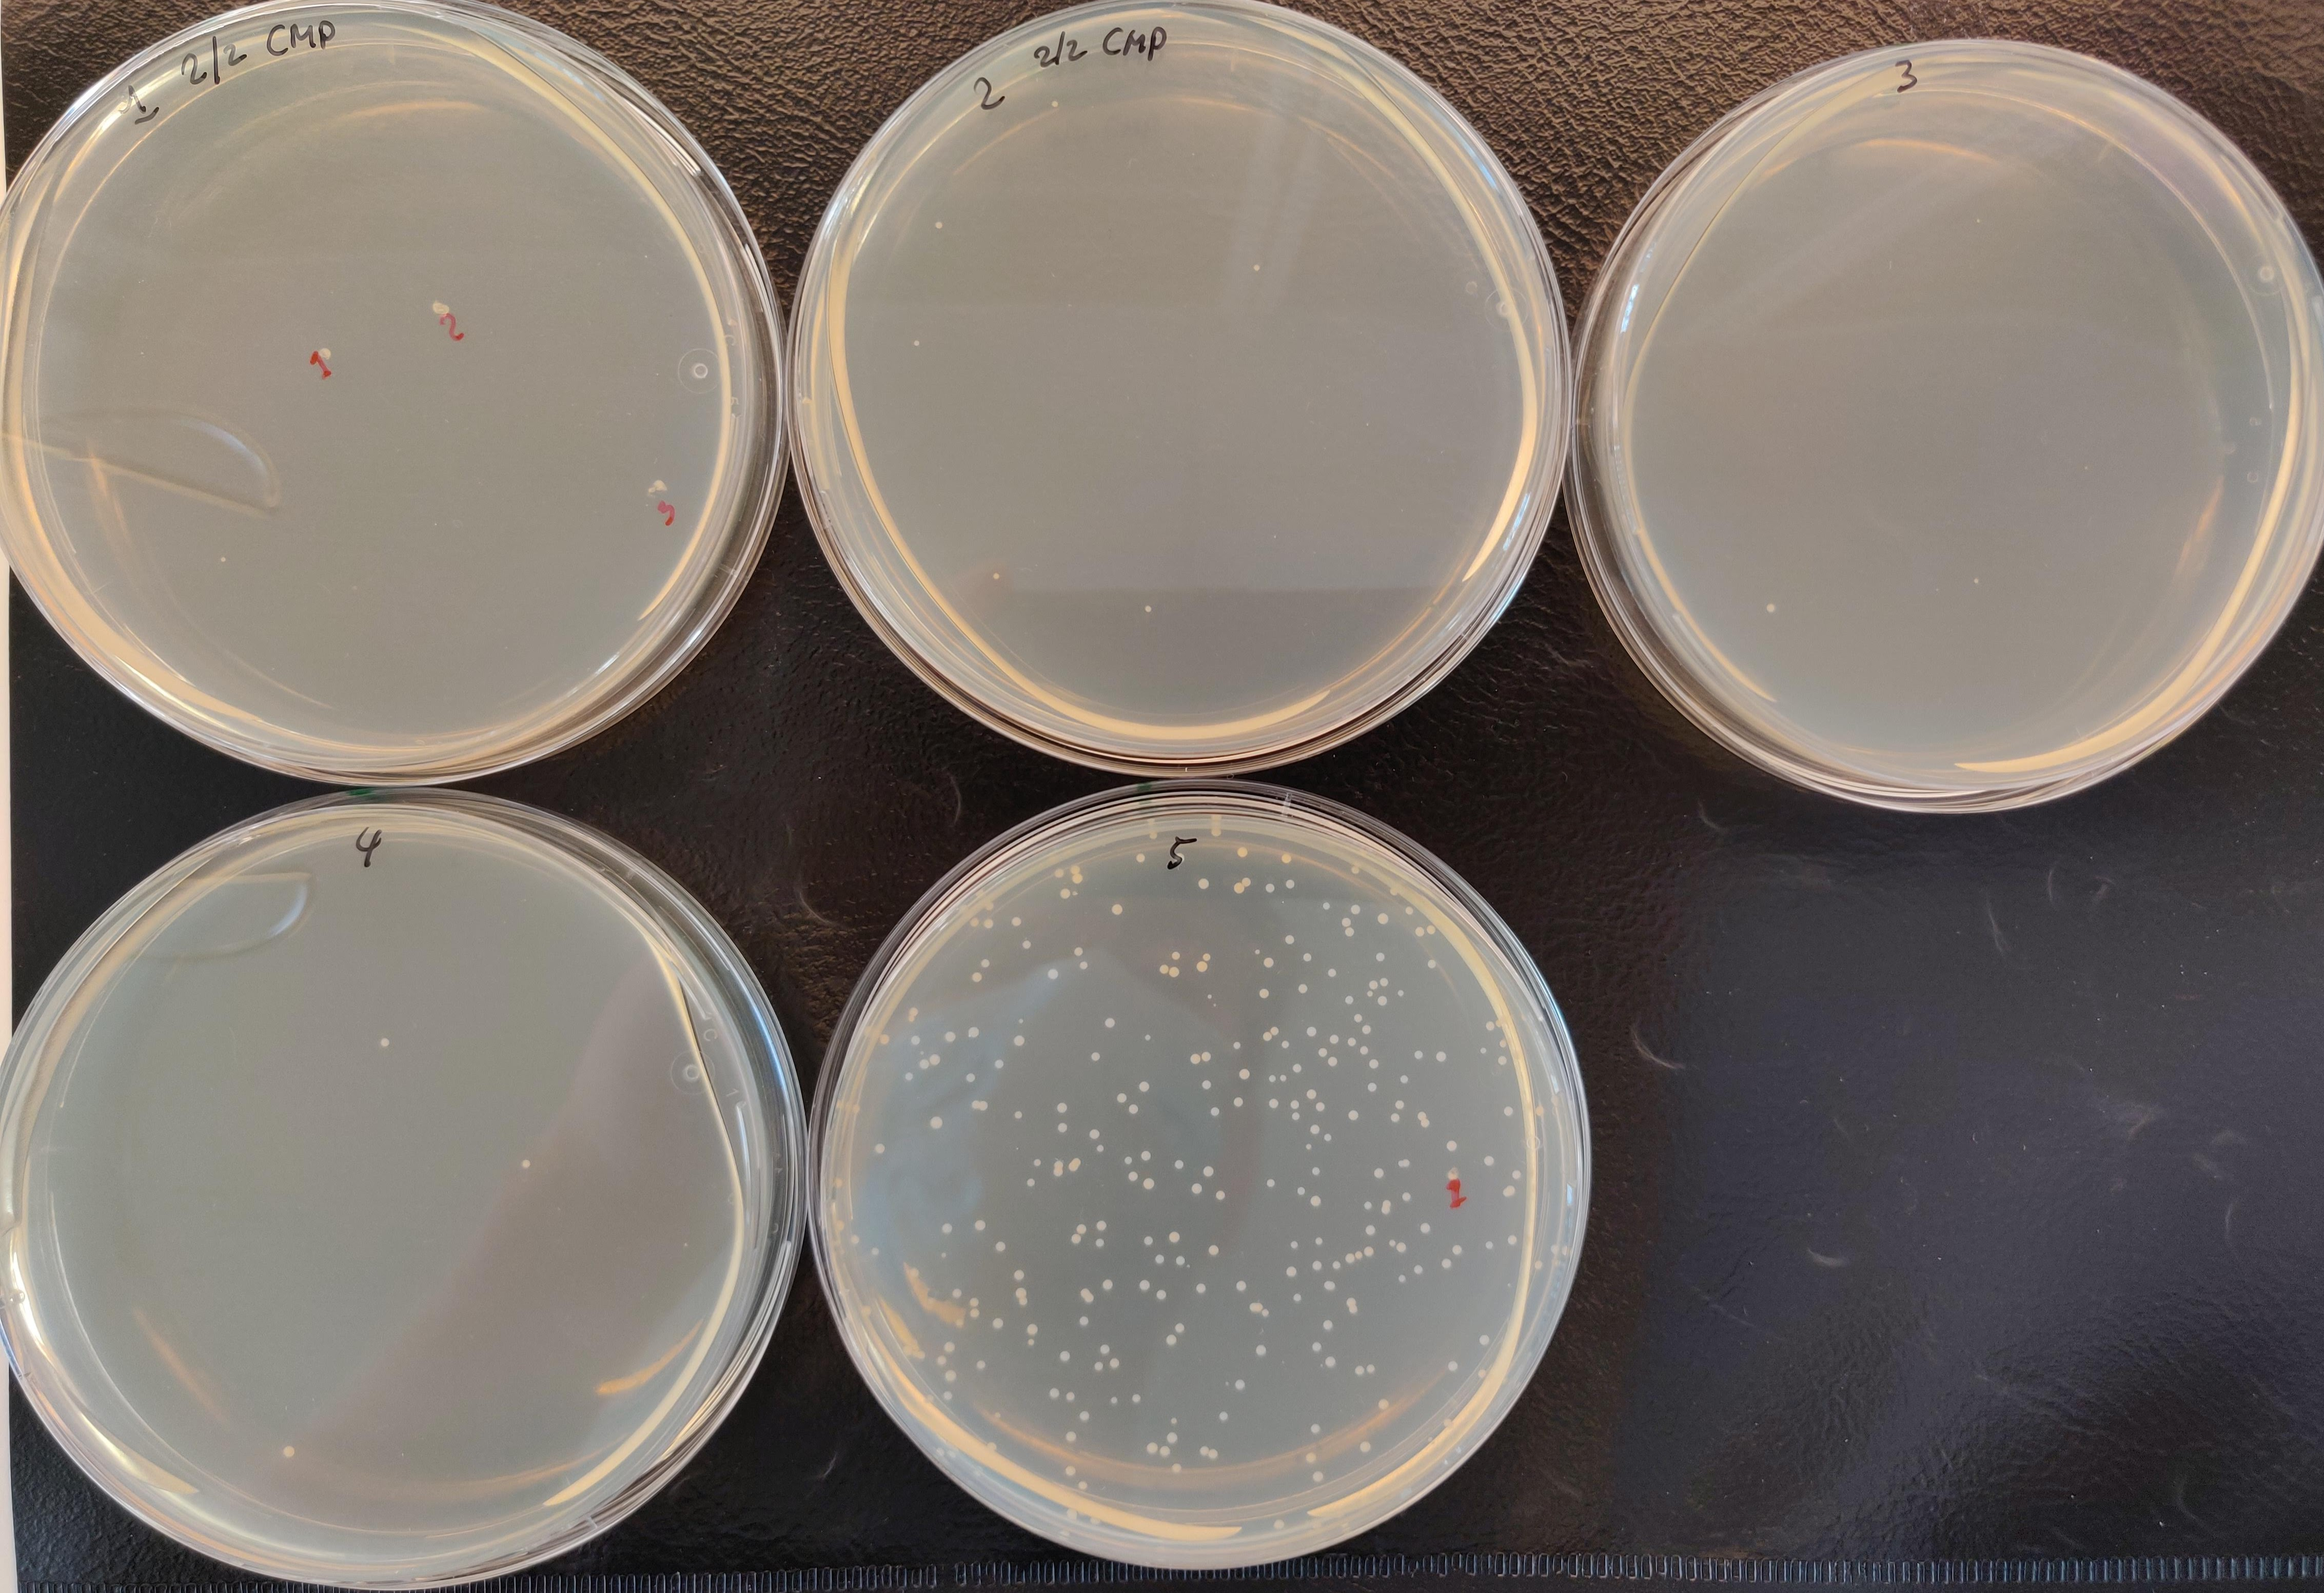

In [45]:
Image('G8H_CPR_library/data/05-gel_bioimager_nanophotometer/raw/doc_it _imaging_station/2021-02-09_transformation_plates.jpg', width=600)

1. Pick 4 colonies from data (x example(2021-01-12)) plate no. 1
2. Plasmid prep
3. Sanger sequence from both ends

Importing primers for colony PCR

In [46]:
ADH1_test_fw = get_dna_from_box_name('tADH1_160_rv', 'primer_box', database_path = 'G8H_CPR_library/data/06-lims/csv_database/')
CYC1_test_rv = get_dna_from_box_name('tCYC1_150_rv', 'primer_box', database_path = 'G8H_CPR_library/data/06-lims/csv_database/')

| Colony no. | Primer_batch_location | Result|
| --- | --- |--- |
| 1 | o1_C07 | Correct |
| 2 | o1_C07 | Wrong |
| 3 | o1_C07 | Correct |
| 4 | o1_C07 | Bad trace |
| 1 | o1_C08 | Correct |
| 2 | o1_C08 | Wrong |
| 3 | o1_C08 | Correct |
| 4 | o1_C08 | Bad trace |

Conclusion: Colony no. 1 and 3 seems correct

Sample 1 becomes batch 001 in location p1_G09
Sample 3 becomes batch 002 in location p1_I01

In [47]:
rec_vec.name = 'Double_gRNA_vecor_p1_G09_(pESC-LEU-gRNA_ATF1_CroCPR)'

In [48]:
rec_vec.annotations['batches'] = [{'location':['p1_G09']},{'location':['p1_I01']}]

Now we can upload the the sequence and location to a local LIMS system or a database

In [49]:
from teemi.lims.csv_database import add_annotations, get_unique_id, add_sequences_to_dataframe , update_database

In [50]:
# Adding annotations
rec_vec = add_annotations([rec_vec], volume = 50, concentration = 67, location = 'p1_G09', comments = 'USER_vector to KO G8H and CPR module')
rec_vec = rec_vec[0]

# getting a unique id from the databse
rec_vec.id =  get_unique_id(path='G8H_CPR_library/data/06-lims/csv_database/' )

# add the PCR_to the pcr_box
plasmid_plates = get_database('plasmid_plates', path="G8H_CPR_library/data/06-lims/csv_database/")
add_sequences_to_dataframe([rec_vec], plasmid_plates)

### already did this
#update_database(plasmid_plates, 'plasmid_plates', path ="/content/G8H_CPR_library/Data/csv_database/" )

In [51]:
plasmid_plates.head(20)

,ID,name,date,plate,row,col,size,seq,concentration,volume,features,location,reference,comments,description
0,10000.0,Backbone_template - p0056_(pESC-LEU-ccdB-USER)...,08-15-2022,0,A,1,8798.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,107.0,139.0,[],plasmid_plates,NaN,NaN,seq_xRUzXWHM <unknown description>
1,10001.0,gRNA2_template - pESC-LEU-gRNA_CroCPR-2 (1).fasta,08-15-2022,0,A,2,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,93.0,118.0,[],plasmid_plates,NaN,NaN,seq_Qy1hV9Gf <unknown description>
2,10002.0,LEU_plasmid.fasta,08-15-2022,0,A,3,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,78.0,86.0,[],plasmid_plates,NaN,NaN,seq_Qy1hV9Gf <unknown description>
3,10003.0,PL_02_E2(pRS413U-P2_PGK1-mKate2.fasta,08-15-2022,0,A,4,6982.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,100.0,144.0,[],plasmid_plates,NaN,NaN,seq_stP1p5JB <unknown description>
4,10004.0,pCfB-56(pESC-LEU-gRNA_ATF1-CroCPR).fasta,08-15-2022,0,A,5,7797.0,TGGCGGGTGTCGGGGCTGGCTTAACTATGCGGCATCAGAGCAGATT...,103.0,134.0,[],plasmid_plates,NaN,NaN,seq_AA4vOQs1 <unknown description>
5,10005.0,gRNA1_template (1).fasta,08-15-2022,0,A,6,6841.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,129.0,101.0,[],plasmid_plates,NaN,NaN,seq_Qy1hV9Gf <unknown description>
6,10006.0,pl_12_i6_pesc-ura-grna_xi2-2.gb,08-15-2022,0,A,7,5734.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,77.0,125.0,[SeqFeature(FeatureLocation(ExactPosition(416)...,plasmid_plates,NaN,NaN,NaN
7,10007.0,TRP_POS_CONTROL_test.gb,08-15-2022,0,A,8,8798.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,118.0,122.0,[SeqFeature(FeatureLocation(ExactPosition(662)...,plasmid_plates,NaN,NaN,NaN
8,10008.0,pRS416.gb,08-15-2022,0,A,9,4898.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,85.0,90.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",plasmid_plates,NaN,NaN,pRS416
9,10009.0,pRS414.gb,08-15-2022,0,A,10,4788.0,TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCT...,123.0,118.0,"[SeqFeature(FeatureLocation(ExactPosition(0), ...",plasmid_plates,NaN,NaN,pRS414
